# task 6.2 exploring relationships of continuous variables in e-commerce data set using seaborn to create visuals

## 1 importing libraries and data

## 2 cleaning

## 3 variable relationships study: 
     visuals and evaluations included
        box plots
        correlation matrices and heat map
        scatterplots
        pair plots
        categorical plots
>project questions addressed from initial cleaning
> 1. Which products have highest demand. Is there seasonality to the demand
> 2. Which products are most profitable? Categories?
> 3. Which regions are most profitable and least? 


## 4 summary of discoveries
    new question
        How can profitability increase?

    hypothesis creation 
  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__


'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#import the ecommerce dataset 
df = pd.read_csv(r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\original us ecommerce 2020\US  E-commerce records 2020.csv", encoding = 'latin1')

In [5]:
#checking data
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


## 2 cleaning
### check for dups

In [6]:
#no dups found

df.duplicated().sum()

0

### missing values check

In [7]:
# no missing values found

df.isnull().sum() 

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### check for mixed dtypes in a row

In [8]:
#no mixed-type columns

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
      else:  
        print ('none')

none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none


### change dtype 

In [9]:
#change data type of order date, row id, postal code

df['Order Date'] = df['Order Date'].astype('datetime64') 
df['Row ID'] = df['Row ID'].astype('string')
df['Postal Code'] = df['Postal Code'].astype('string')


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3312 non-null   datetime64[ns]
 1   Row ID        3312 non-null   string        
 2   Order ID      3312 non-null   object        
 3   Ship Mode     3312 non-null   object        
 4   Customer ID   3312 non-null   object        
 5   Segment       3312 non-null   object        
 6   Country       3312 non-null   object        
 7   City          3312 non-null   object        
 8   State         3312 non-null   object        
 9   Postal Code   3312 non-null   string        
 10  Region        3312 non-null   object        
 11  Product ID    3312 non-null   object        
 12  Category      3312 non-null   object        
 13  Sub-Category  3312 non-null   object        
 14  Product Name  3312 non-null   object        
 15  Sales         3312 non-null   float64 

In [11]:
#view statistics

df.describe()

,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340
std,585.257531,2.221776,0.207429,241.864342
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.018000,2.000000,0.000000,1.763200
50%,53.810000,3.000000,0.200000,8.296800
75%,205.105700,5.000000,0.200000,28.315125
max,13999.960000,14.000000,0.800000,6719.980800


### insight: 
* the significant difference in std from the mean indicates large variability in the data
* based on max and min, the spread of sales and profit is wide with most values clustered in a small of part of range
* theres a right tail to all the variables, extreme for sales and profit

In [12]:
#view the number of unique values for each column
df.nunique()

Order Date       322
Row ID          3312
Order ID        1687
Ship Mode          4
Customer ID      693
Segment            3
Country            1
City             350
State             47
Postal Code      437
Region             4
Product ID      1525
Category           3
Sub-Category      17
Product Name    1511
Sales           2552
Quantity          14
Discount          12
Profit          2881
dtype: int64

### insight:
* many of the qualitative variables have a small amount of values which will facilitate segmenting and drilldown
* revenue can be derived from sales and profit
* derive a column for profit and price per product unit

## 3 variable relationships study 
### correlations 


In [13]:
#display correlation table 
df.corr()

C:\Users\andre\AppData\Local\Temp\ipykernel_15804\2502251566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.191127,-0.033516,0.532312
Quantity,0.191127,1.000000,0.019184,0.053766
Discount,-0.033516,0.019184,1.000000,-0.218343
Profit,0.532312,0.053766,-0.218343,1.000000


In [14]:
#check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3312 non-null   datetime64[ns]
 1   Row ID        3312 non-null   string        
 2   Order ID      3312 non-null   object        
 3   Ship Mode     3312 non-null   object        
 4   Customer ID   3312 non-null   object        
 5   Segment       3312 non-null   object        
 6   Country       3312 non-null   object        
 7   City          3312 non-null   object        
 8   State         3312 non-null   object        
 9   Postal Code   3312 non-null   string        
 10  Region        3312 non-null   object        
 11  Product ID    3312 non-null   object        
 12  Category      3312 non-null   object        
 13  Sub-Category  3312 non-null   object        
 14  Product Name  3312 non-null   object        
 15  Sales         3312 non-null   float64 

In [15]:
# subset excluding the non numeric variables 

sub = df[['Sales', 'Quantity', 'Discount', 'Profit']]

In [16]:
#check
sub

,Sales,Quantity,Discount,Profit
0,48.896,4,0.2,8.5568
1,474.430,11,0.0,199.2606
2,3.600,2,0.0,1.7280
3,454.560,5,0.2,-107.9580
4,141.420,5,0.6,-187.3815
...,...,...,...,...
3307,90.930,7,0.0,2.7279
3308,52.776,3,0.2,19.7910
3309,13.904,2,0.2,4.5188
3310,20.720,2,0.2,6.4750


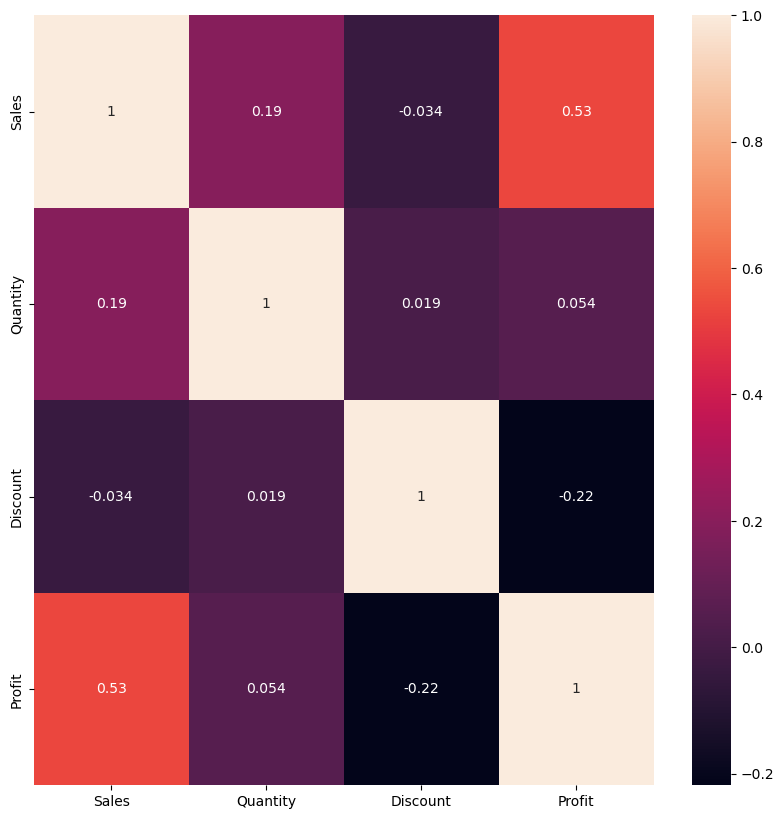

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### scatterplots based on medium-strong corr between sales and profit

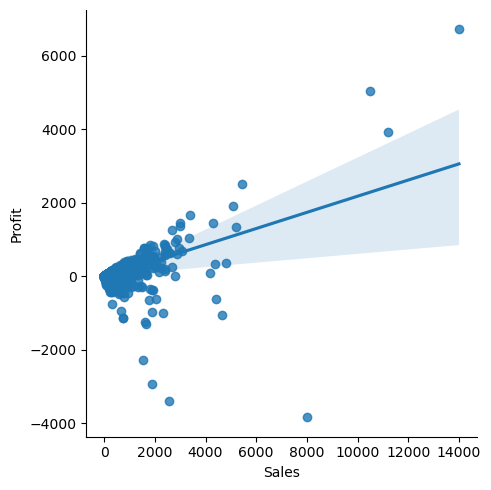

In [18]:
# relationship of sales and profit is expected to be positive but theres known loss

sns.lmplot(x = 'Sales', y = 'Profit', data = df)

### pair plots

In [19]:
#using the numeric values 
sub

,Sales,Quantity,Discount,Profit
0,48.896,4,0.2,8.5568
1,474.430,11,0.0,199.2606
2,3.600,2,0.0,1.7280
3,454.560,5,0.2,-107.9580
4,141.420,5,0.6,-187.3815
...,...,...,...,...
3307,90.930,7,0.0,2.7279
3308,52.776,3,0.2,19.7910
3309,13.904,2,0.2,4.5188
3310,20.720,2,0.2,6.4750


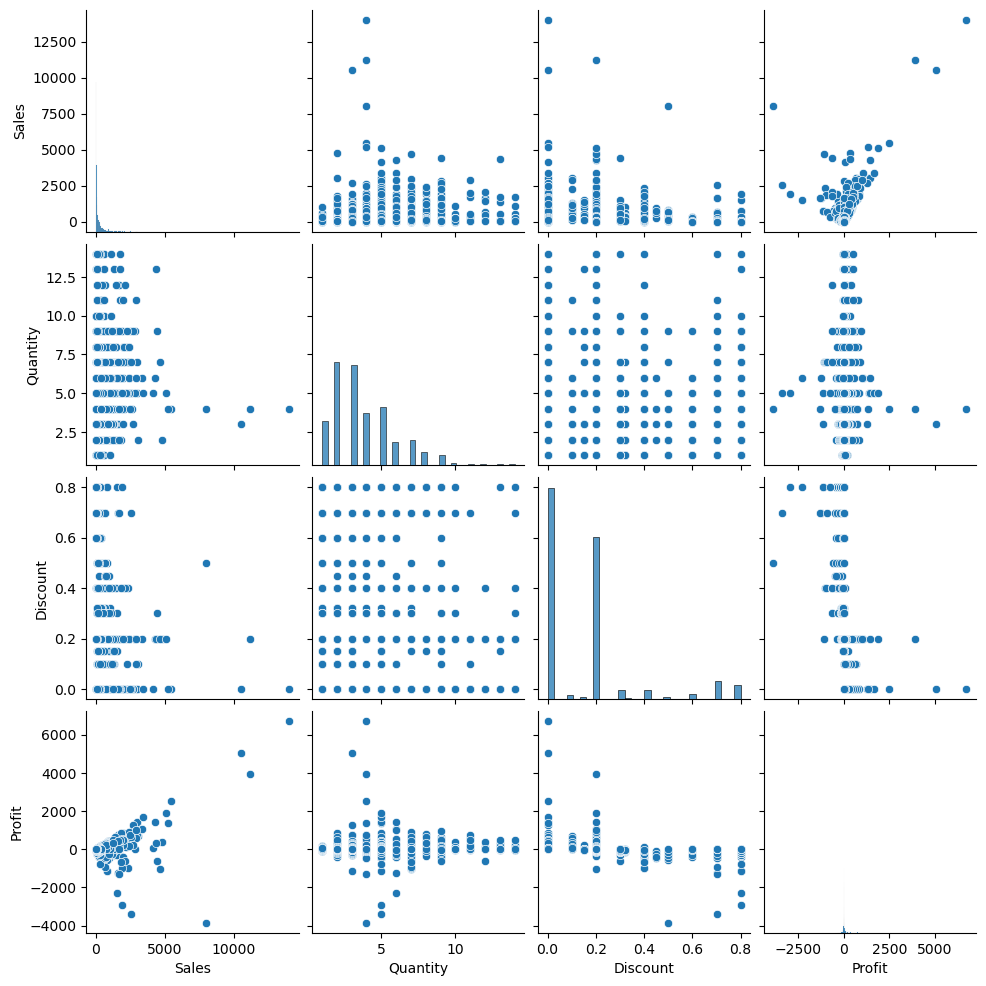

In [20]:
# Create a pair plot 

g = sns.pairplot(sub)

## project question 1
### Which products have highest demand? Is there seasonality to the demand?


In [21]:
#solve for frequency of product id based on number of orders (row id is unique, each row should count as a unique product order)
prod_freq = df.groupby('Product ID')['Row ID'].count().sort_values(ascending=False)
prod_freq.head(50)

Product ID
FUR-CH-10003774    8
OFF-PA-10001970    7
TEC-AC-10003832    7
OFF-ST-10001325    7
OFF-BI-10004632    7
TEC-AC-10004510    7
OFF-PA-10003673    7
OFF-ST-10003208    7
OFF-BI-10000632    6
OFF-BI-10000301    6
OFF-AP-10000358    6
OFF-PA-10000157    6
OFF-PA-10000357    6
OFF-PA-10001033    6
OFF-BI-10002012    6
FUR-TA-10001520    6
OFF-BI-10003274    6
OFF-PA-10002377    6
OFF-PA-10002479    6
OFF-PA-10003172    6
OFF-ST-10000615    6
FUR-FU-10001473    6
FUR-FU-10004973    5
TEC-PH-10003555    5
OFF-BI-10001670    5
OFF-BI-10001543    5
OFF-BI-10001524    5
OFF-BI-10001359    5
TEC-AC-10004469    5
OFF-BI-10000546    5
TEC-AC-10004571    5
FUR-FU-10004848    5
TEC-PH-10002564    5
OFF-BI-10000145    5
OFF-AR-10003602    5
OFF-AR-10001958    5
FUR-FU-10003601    5
TEC-PH-10002200    5
FUR-TA-10003473    5
OFF-BI-10003910    5
OFF-BI-10003364    5
TEC-AC-10000158    5
OFF-ST-10000563    5
OFF-ST-10000344    5
OFF-ST-10001522    5
OFF-ST-10001809    5
OFF-ST-10002301    5
OF

<Axes: ylabel='Frequency'>

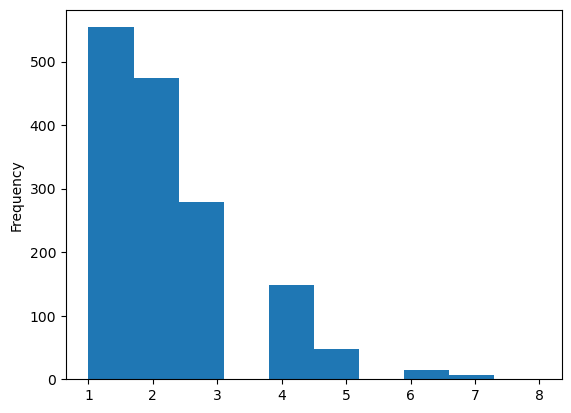

In [22]:
#histogram of product number 
prod_freq.plot.hist(bins = 10)


Text(0.5, 1.0, 'Product ID Box Plot')

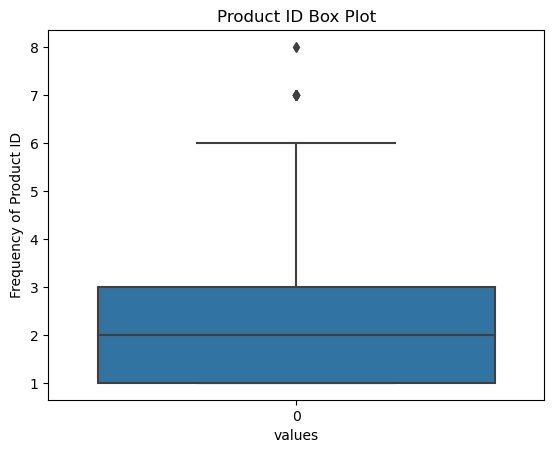

In [23]:


#plot for frequency of product number 
sns.boxplot(prod_freq)

# add labels and title
plt.ylabel('Frequency of Product ID')
plt.xlabel('values')
plt.title('Product ID Box Plot')

### insight: 
* majority of products have been ordered one time during 2020
* few items with frequency above 3 orders

In [24]:
#frequency of top ten products
top_10_prod_freq = prod_freq.head(10)
top_10_prod_freq


Product ID
FUR-CH-10003774    8
OFF-PA-10001970    7
TEC-AC-10003832    7
OFF-ST-10001325    7
OFF-BI-10004632    7
TEC-AC-10004510    7
OFF-PA-10003673    7
OFF-ST-10003208    7
OFF-BI-10000632    6
OFF-BI-10000301    6
Name: Row ID, dtype: int64

Text(0.5, 1.0, 'Top Ten Product ID per Order Frequency')

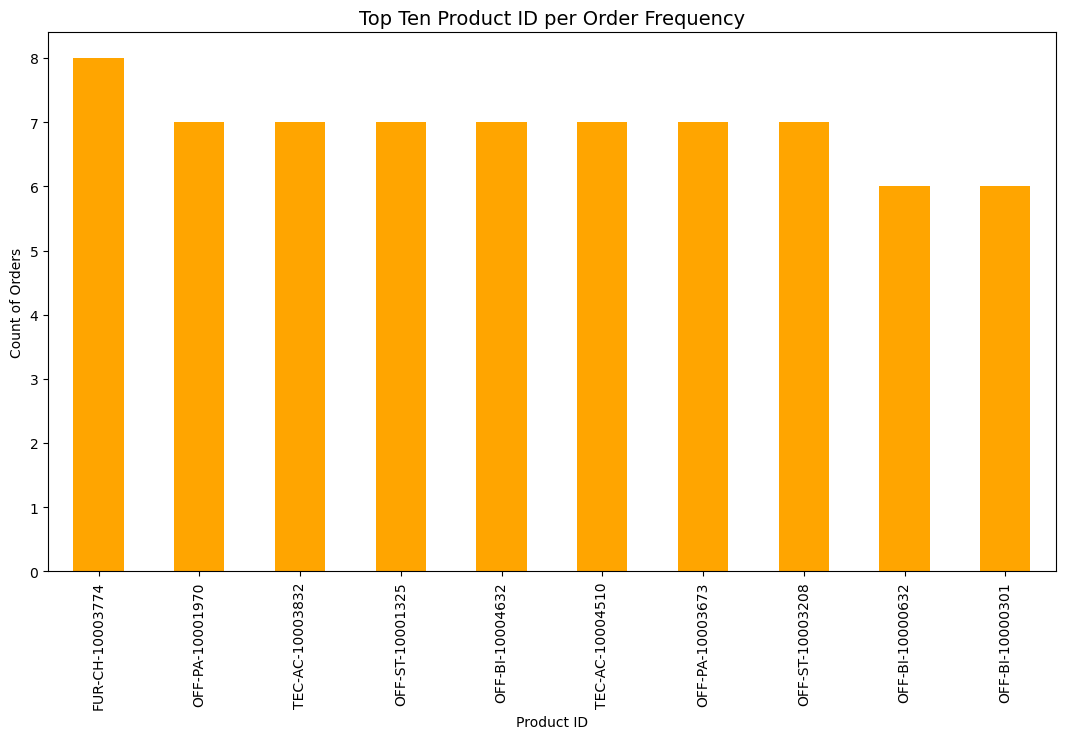

In [25]:
#bar chart of top ten products
plt.figure(figsize=(13,7))
plt.ylabel('Count of Orders')
top_10_prod_freq.plot(kind="bar", color = 'orange')
plt.title('Top Ten Product ID per Order Frequency', fontsize=14) # add title

Text(0.5, 1.0, 'Seasonality of Demand: Filtered for >10 Reorders')

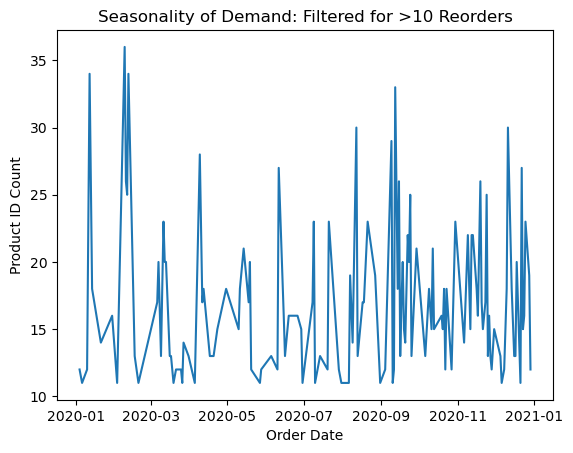

In [26]:
#correlation of product with time,checking for seasonality or higher frequency and lower frequency product orders throughout the year
ord_freq = df.groupby('Order Date')['Row ID'].count().sort_values(ascending=False)
sns.lineplot(ord_freq.loc[ord_freq > 10])
plt.ylabel('Product ID Count')
plt.title('Seasonality of Demand: Filtered for >10 Reorders', fontsize=12) # add title


### insight:
### there appears to be a frequency of orders 
### next step: investigate in a time series analysis 

## project question 2 
### which products are most profitable? categories?

Text(0.5, 1.0, 'Profits')

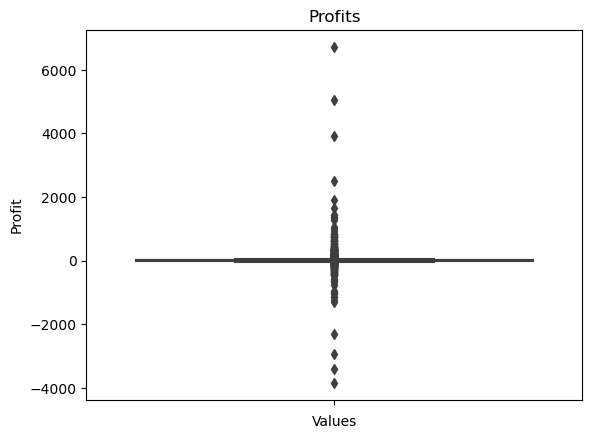

In [27]:
# view spread of profit for insight
sns.boxplot(y=df['Profit'])

# add labels and title
plt.xlabel('Values')
plt.ylabel('Profit')
plt.title('Profits')

### insight:
### *large spread, with many unprofitable sales
### *profits centers need to be identified by removing outliers (same for loss)

<Axes: xlabel='Profit', ylabel='Count'>

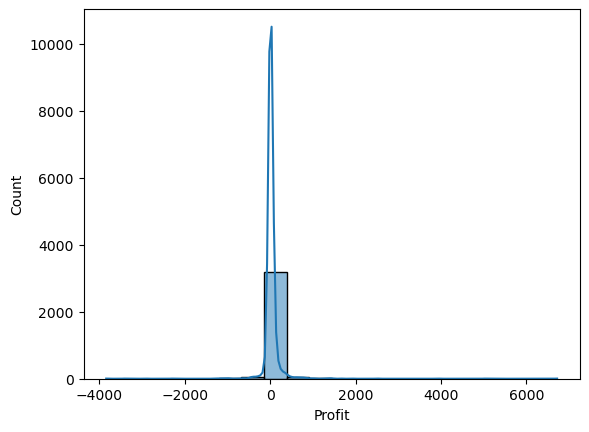

In [28]:
#discovering the profit spread 
sns.histplot(df['Profit'], bins = 20, kde = True)

In [29]:
#subset the profit reducing outliers, viewing to create bins for flag column
sub_profit = df['Profit'][(df['Profit'] > -200) & (df['Profit'] < 200)]

<Axes: xlabel='Profit', ylabel='Count'>

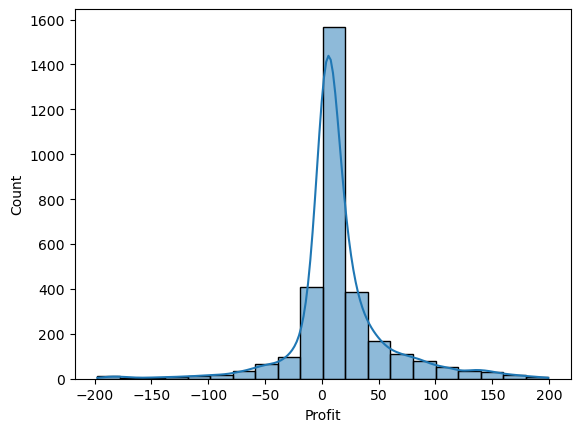

In [30]:
sns.histplot(sub_profit, bins = 20, kde = True)

### insight:
     *vast majority of sales have profit under 25usd 
     *creating a column to show percent profit would help understand profit centers better
     *next step to create flag column

In [31]:
#creating profit flags 0-77 low, 77-150 medium, 150+ high, <0 loss
df.loc[(df['Profit'] >= 0) & (df['Profit'] < 77), 'prof_cat'] = 'low profit'

In [32]:
df.loc[(df['Profit'] > 77) & (df['Profit'] < 150), 'prof_cat'] = 'medium profit'

In [33]:
df.loc[(df['Profit'] >= 150), 'prof_cat'] = 'high profit'

In [34]:
df.loc[(df['Profit'] < 0), 'prof_cat'] = 'profit loss'

In [35]:
df['prof_cat'].value_counts(dropna = False)

low profit       2308
profit loss       620
medium profit     202
high profit       182
Name: prof_cat, dtype: int64

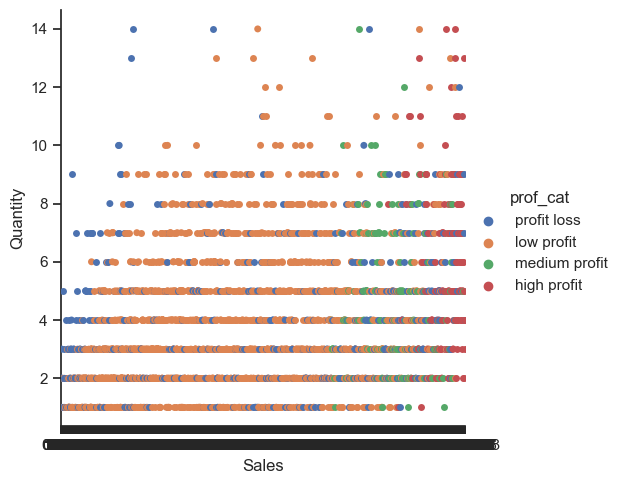

In [36]:
#explore quantity for profit trend
sns.set(style="ticks")
g = sns.catplot(x="Sales", y="Quantity", hue="prof_cat", data=df)

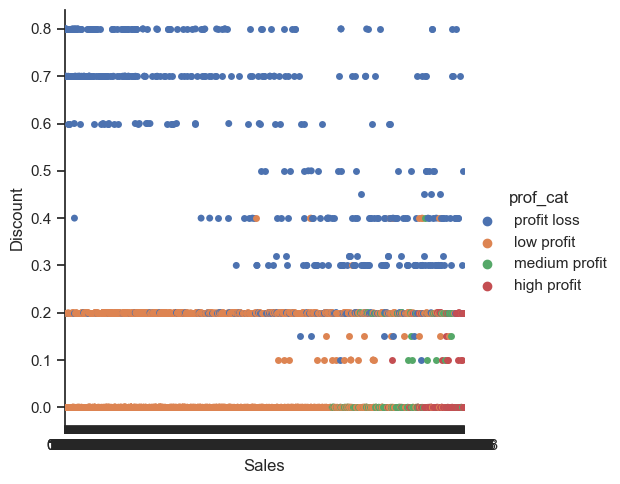

In [37]:
#explore discount for profit trend 
sns.set(style="ticks")
g = sns.catplot(x="Sales", y="Discount", hue="prof_cat", data=df)

### insight:
    * discount at 20% and below has higher profit potential

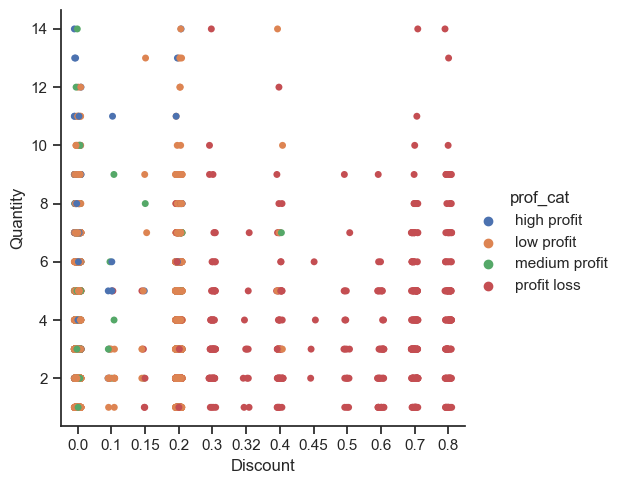

In [38]:
sns.set(style="ticks")
g = sns.catplot(x="Discount", y="Quantity", hue="prof_cat", data=df)

### insight:
profit centers are where discount is low and quantity is medium to high

In [39]:
#solve for top ten products with highest profit 
top_ten_products = df.groupby('Product ID')['Profit'].sum().nlargest(10)
top_ten_products

Product ID
TEC-CO-10004722    15679.9552
TEC-CO-10001449     3623.9396
OFF-BI-10001359     1910.5887
OFF-BI-10003925     1753.7148
TEC-CO-10003236     1691.9718
TEC-CO-10001046     1679.9760
TEC-MA-10003673     1668.2050
TEC-AC-10002049     1493.3574
TEC-PH-10001459     1469.9650
TEC-MA-10001047     1351.9896
Name: Profit, dtype: float64

## which categories are most profitable?

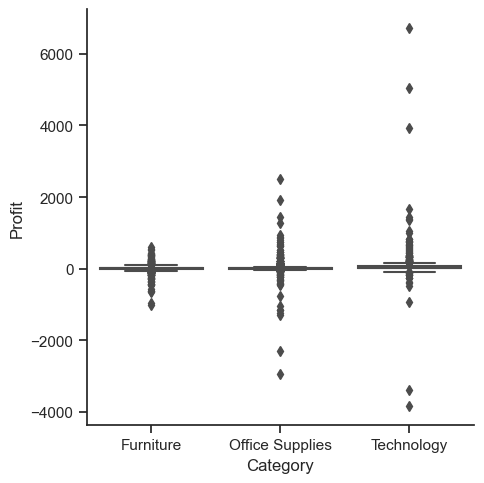

In [40]:
#view box and whisker of sales for each customer segment
sns.catplot(x='Category', y='Profit', kind='box', data=df)


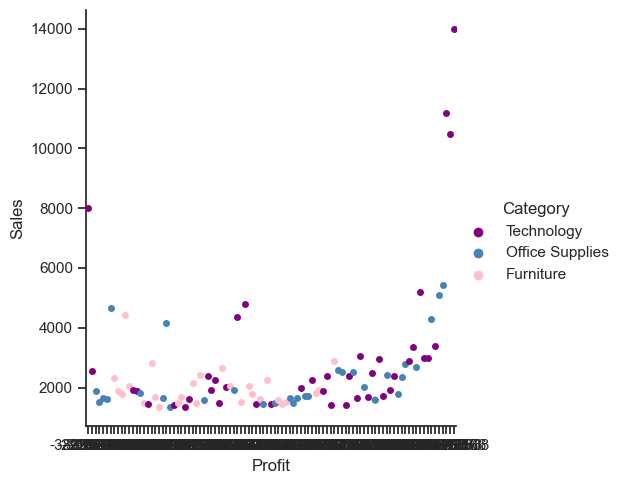

In [62]:
# df_top_100_sales not defined yet...cell copied and pasted from below
# using the top 100 sales, sales and profit with segment
sns.catplot(x='Profit', y='Sales', hue='Category', data=df_top_100_sales, palette=['purple', 'steelblue', 'pink'])

### insight:
technology and office supplies offer more profit potential over furniture

### question 3 which regions are most profitable and least?

In [42]:
regional_profitability = df.groupby('Region')['Profit'].sum()
regional_profitability

Region
Central     7550.8442
East       33230.5614
South       8848.9079
West       43808.9561
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Regional Profitability')

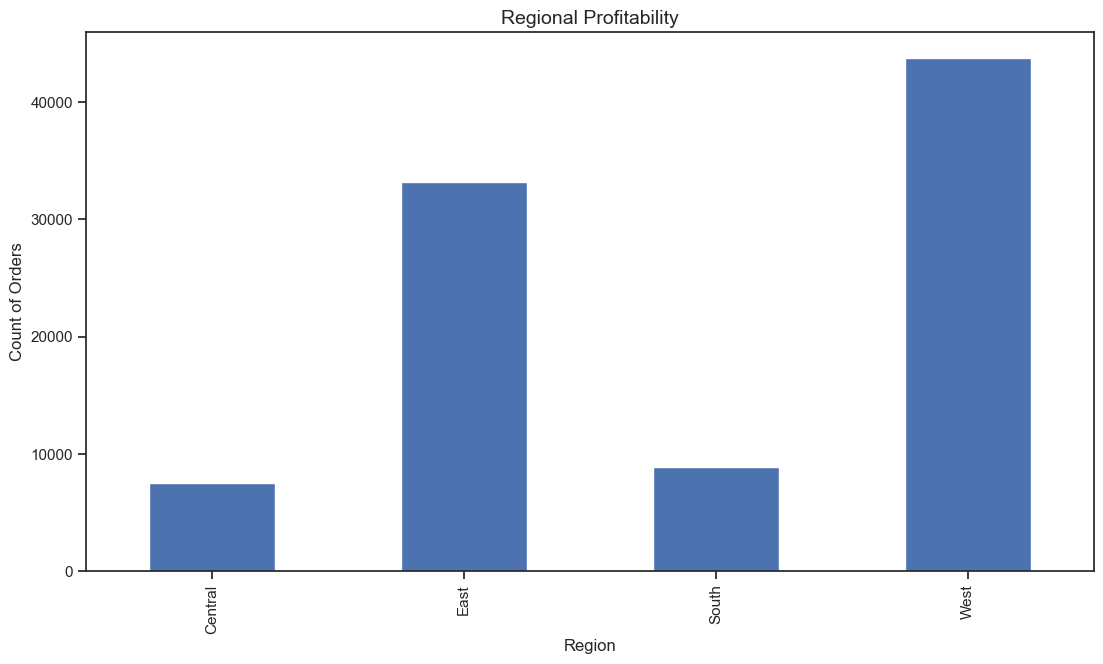

In [43]:
plt.figure(figsize=(13,7))
plt.ylabel('Count of Orders')
regional_profitability.plot(kind='bar')
plt.title('Regional Profitability', fontsize=14)

### sales numbers exploration

<Axes: xlabel='Sales', ylabel='Count'>

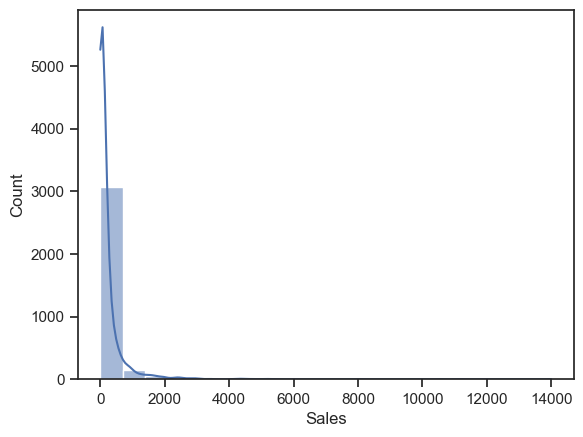

In [44]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Sales'], bins = 20, kde = True)

Text(0.5, 1.0, 'sales box plot')

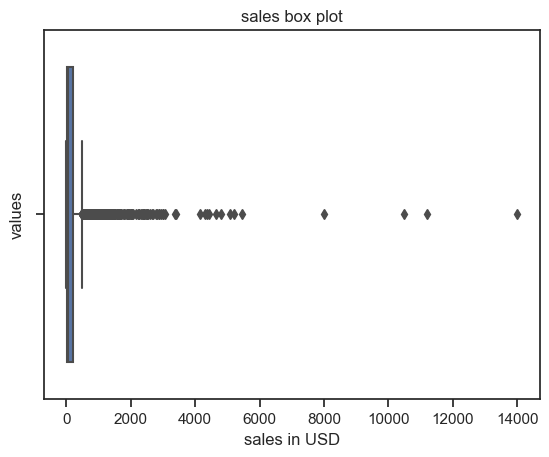

In [45]:
# view sales data for outliers shape and spread
sns.boxplot(x=df['Sales'])

# add labels and title
plt.xlabel('sales in USD')
plt.ylabel('values')
plt.title('sales box plot')

#### the majority of sales are under 1000 usd w many outliers up to 14K
#### * evaluate the outliers, what is different about the largest sales? (customer segment and product type) 
#### * consider grouping sales  by flag or subset for evaluating segments of customer

In [46]:
#view rows of top sales

df.sort_values(['Sales'], ascending=[False]).head(50)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat
427,2020-03-23,8154,CA-2017-140151,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,high profit
2302,2020-10-22,2624,CA-2017-127180,First Class,TA-21385,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,high profit
2644,2020-11-17,4191,CA-2017-166709,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,high profit
2443,2020-04-11,684,US-2017-168116,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,profit loss
66,2020-01-16,6521,CA-2017-138289,Second Class,AR-10540,Consumer,United States,Jackson,Michigan,49201,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,high profit
2148,2020-05-10,6341,CA-2017-143112,Standard Class,TS-21370,Corporate,United States,New York City,New York,10035,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960,4,0.0,1351.9896,high profit
2225,2020-10-13,8859,CA-2017-135909,Standard Class,JW-15220,Corporate,United States,Sacramento,California,95823,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,high profit
505,2020-01-04,4219,CA-2017-149881,First Class,NC-18535,Corporate,United States,San Francisco,California,94110,West,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4799.984,2,0.2,359.9988,high profit
1973,2020-09-22,1804,CA-2017-158379,Second Class,JA-15970,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.736,7,0.2,-1049.3406,profit loss
1513,2020-08-17,7244,CA-2017-118892,Second Class,TP-21415,Consumer,United States,Philadelphia,Pennsylvania,19134,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.8820,profit loss


### insight:
### * top sales are within 'Consumer' and 'Home Office' customer segment; products are high priced items in 'copiers' subcat. and 'Technology' category.
### * top sales are followed by additional high priced items in various categories

In [47]:
#create a subset to explore outliers 
df_top_100_sales = df.sort_values(['Sales'], ascending=[False]).head(100)

In [48]:
df_top_100_sales.tail()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat
3045,2020-09-12,7521,US-2017-167920,Second Class,JL-15835,Consumer,United States,Richmond,Kentucky,40475,South,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,1399.980,2,0.00,629.9910,high profit
803,2020-05-14,815,CA-2017-143686,Same Day,PJ-19015,Consumer,United States,Santa Ana,California,92704,West,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,1399.930,7,0.00,601.9699,high profit
2448,2020-04-11,3800,CA-2017-147760,First Class,KL-16555,Corporate,United States,Greensboro,North Carolina,27405,South,TEC-PH-10002483,Technology,Phones,Motorola Moto X,1359.960,5,0.20,118.9965,medium profit
1013,2020-10-06,4520,CA-2017-107167,Standard Class,ND-18460,Corporate,United States,Jacksonville,Florida,32216,South,OFF-ST-10003805,Office Supplies,Storage,"24 Capacity Maxi Data Binder Racks, Pearl",1347.520,8,0.20,84.2200,medium profit
2992,2020-08-12,413,CA-2017-117457,Standard Class,KH-16510,Consumer,United States,San Francisco,California,94110,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,1336.829,13,0.15,31.4548,low profit


Text(0.5, 1.0, 'sales box plot')

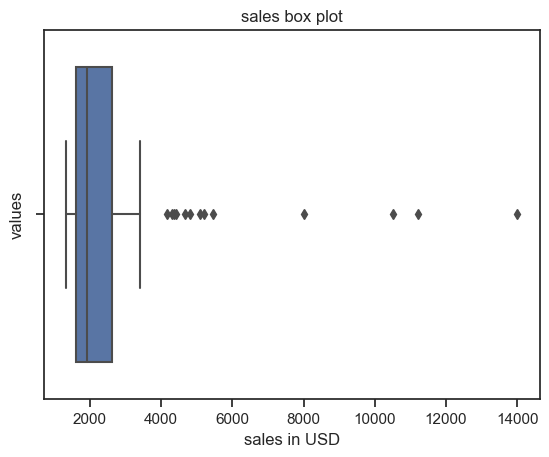

In [49]:
#view spread of outliers

sns.boxplot(x=df_top_100_sales['Sales'])

# add labels and title
plt.xlabel('sales in USD')
plt.ylabel('values')
plt.title('sales box plot')

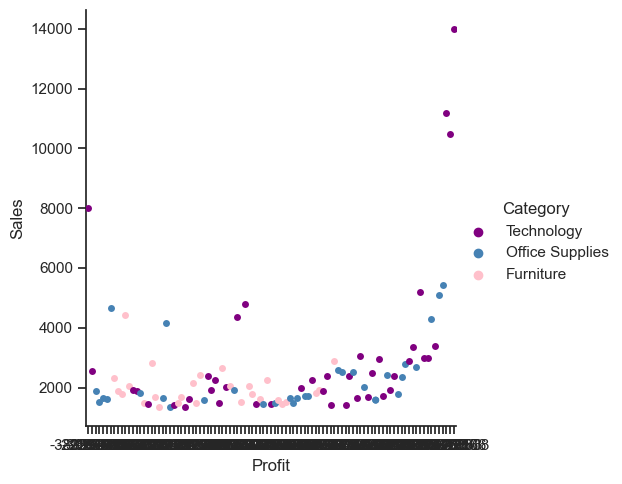

In [50]:
# using the top 100 sales, sales and profit with segment
sns.catplot(x='Profit', y='Sales', hue='Category', data=df_top_100_sales, palette=['purple', 'steelblue', 'pink'])

### quantity purchased explorations

 top sales by customer segment

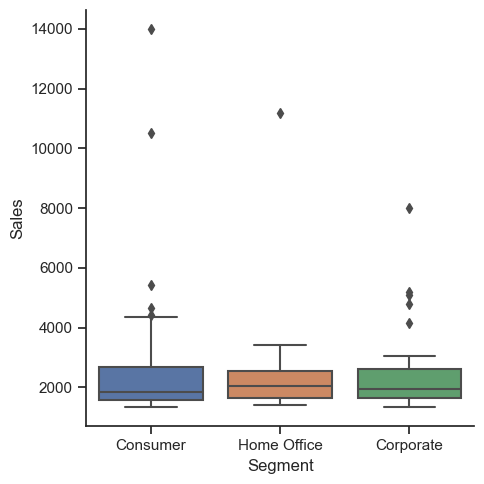

In [51]:
#view box and whisker of sales for each customer segment
sns.catplot(x='Segment', y='Sales', kind='box', data=df_top_100_sales)



 top sales by category

In [52]:
df_top_100_sales['Category'].value_counts()

Technology         41
Office Supplies    32
Furniture          27
Name: Category, dtype: int64

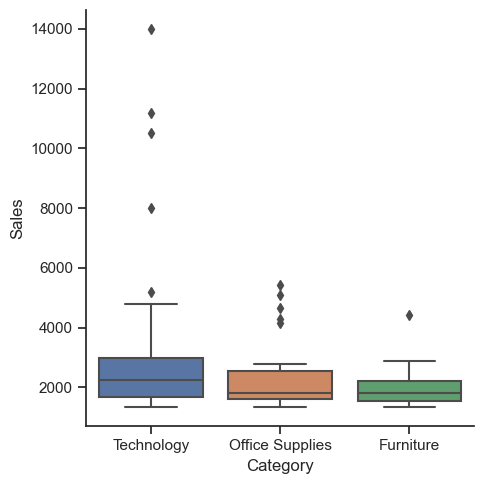

In [53]:
sns.catplot(x='Category', y='Sales', kind='box', data=df_top_100_sales)

 top sales by region

In [54]:
df_top_100_sales['Region'].value_counts()

West       33
East       24
Central    22
South      21
Name: Region, dtype: int64

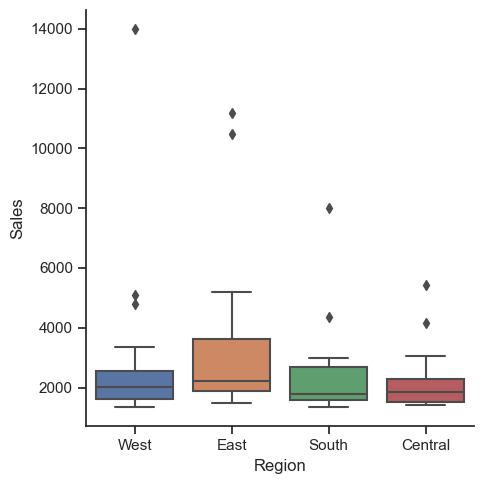

In [55]:
sns.catplot(x='Region', y='Sales', kind='box', data=df_top_100_sales)

In [56]:
df_top_100_sales['City'].value_counts()

New York City       11
Seattle              8
Los Angeles          6
San Francisco        6
Philadelphia         6
Houston              3
Richmond             3
Columbus             3
Detroit              3
Columbia             3
Burlington           3
Jacksonville         2
Indianapolis         2
Atlanta              2
Jackson              2
Henderson            2
Lafayette            2
Tulsa                1
Minneapolis          1
San Diego            1
Santa Ana            1
North Las Vegas      1
Westminster          1
Austin               1
Concord              1
Memphis              1
Independence         1
Milwaukee            1
Muskogee             1
Franklin             1
Torrance             1
Knoxville            1
Chicago              1
Aurora               1
Newark               1
Sacramento           1
Tallahassee          1
Springfield          1
Great Falls          1
Roswell              1
Bellingham           1
Plainfield           1
Louisville           1
Brentwood  

top sales by california, new york, and washington

In [57]:
df_top_100_sales['State'].value_counts()

California        21
New York          11
Washington         9
Pennsylvania       6
Michigan           5
Kentucky           4
Tennessee          4
Texas              4
Indiana            4
Georgia            4
North Carolina     4
Florida            3
New Jersey         2
Louisiana          2
Missouri           2
Illinois           2
Maryland           2
Oklahoma           2
Minnesota          1
Nevada             1
Wisconsin          1
Nebraska           1
Ohio               1
Colorado           1
Montana            1
Delaware           1
Massachusetts      1
Name: State, dtype: int64

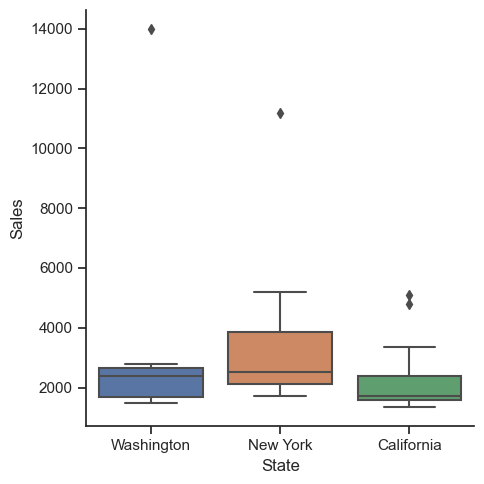

In [58]:
#create a filtered dataframe 
states = ['California', 'New York', 'Washington']
df_filtered_states = df_top_100_sales[df_top_100_sales['State'].isin(states)]

# Create box plots
sns.catplot(x='State', y='Sales', kind='box', data=df_filtered_states)

### summary of sales outliers:
### 'category'.technology  and 'subcat'.printers contain high priced items with few orders 
###    * california is top state with most number of sales outliers
###    * ny, la, seattle top cities with most number of sales outliers

### quantity purchased explorations

Text(0.5, 1.0, 'quantity of products purchased')

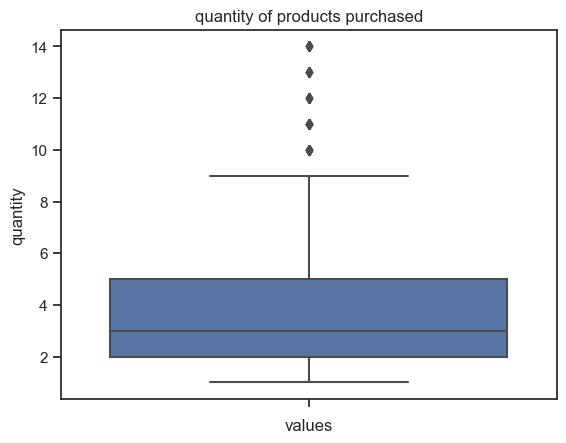

In [59]:
# view spread of purchases for insight
sns.boxplot(y=df['Quantity'])

# add labels and title
plt.xlabel('values')
plt.ylabel('quantity')
plt.title('quantity of products purchased')

### purchase quantity insight:
### *items are purchased in relatively small quantities

### profit purchased explorations

### discount exploration with box plot

Text(0.5, 1.0, 'discount customer recieved')

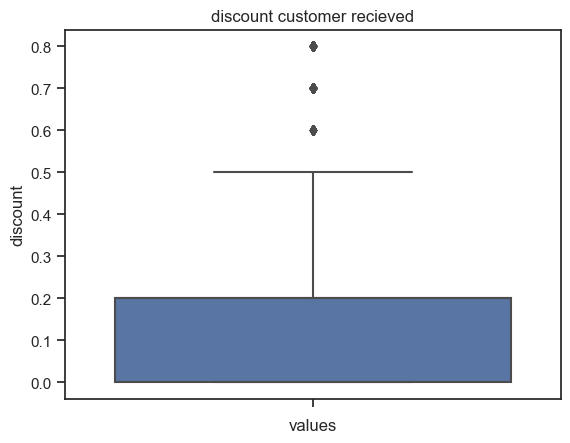

In [60]:
# view spread of discount for insight
sns.boxplot(y=df['Discount'])

# add labels and title
plt.xlabel('values')
plt.ylabel('discount')
plt.title('discount customer recieved')

### discount insight:
### *the majority of discounts given to customers are 20 percent and under

### export cleaned data

In [61]:
#save file as csv
df.to_csv(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\prepared data\task_6.2.csv')

## 4 relationship study key takeaways:
    *need to create derived columns for revenue, also average profit normalized per unit within top sales/ outlier sales group
    *top ten most ordered products (highest demand):
Product ID
FUR-CH-10003774    8
OFF-PA-10001970    7
TEC-AC-10003832    7
OFF-ST-10001325    7
OFF-BI-10004632    7
TEC-AC-10004510    7
OFF-PA-10003673    7
OFF-ST-10003208    7
OFF-BI-10000632    6
OFF-BI-10000301    6
Name: Row ID, dtype: int64

    *products with most profitability are:
Product ID
TEC-CO-10004722    15679.9552
TEC-CO-10001449     3623.9396
OFF-BI-10001359     1910.5887
OFF-BI-10003925     1753.7148
TEC-CO-10003236     1691.9718
TEC-CO-10001046     1679.9760
TEC-MA-10003673     1668.2050
TEC-AC-10002049     1493.3574
TEC-PH-10001459     1469.9650
TEC-MA-10001047     1351.9896
Name: Profit, dtype: float64

    *west is region with most profitability, 
    *california top state
    *new york, los angeles, and seattle top cities



### How to increase profitability?

### Hypothesis:
If sales in medium and high priced items are increased then profits will increase.